In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100

In [3]:
red_wine_data_loc = 'data/winequality-red.csv'
white_wine_data_loc = 'data/winequality-white.csv'

red_wine_data = pd.read_csv(red_wine_data_loc, sep=';', engine='python')
white_wine_data = pd.read_csv(white_wine_data_loc, sep=';', engine='python')

print("Number of red wine records: %i" % len(red_wine_data))
print("Number of white wine records: %i" % len(white_wine_data))

Number of red wine records: 1599
Number of white wine records: 4898


In [4]:
# set label for each type of wine

red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

In [5]:
# combine into one DataFrame

all_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)
print("Number of all wine records: %i" % len(all_wine_data))

Number of all wine records: 6497


In [6]:
all_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
all_wine_data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

In [8]:
all_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

### Summary visualisations for dataset

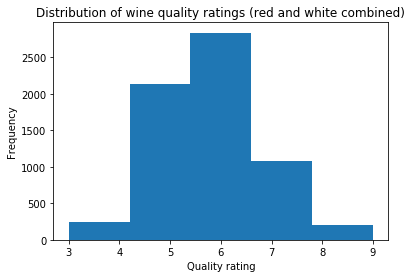

In [15]:
plt.hist(all_wine_data['quality'], bins=5)
plt.title('Distribution of wine quality ratings (red and white combined)')
plt.xlabel('Quality rating')
plt.ylabel('Frequency')
plt.show()